# House Pricing Linear Regression

*We have data of sales of houses in some area. For each house we have information about its Size, Price, Number of Bedrooms, Number of Bathrooms, whether its made of bricks, Neighbourhood.*

**Objective:** *To check whether which factors are affecting house prices*

**Impoting the necessary packages**

In [1]:
import os

import numpy as np
import pandas as pd
import pandas_profiling
 
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import sklearn.preprocessing as preprocess


**Importing the Data**

In [2]:
data=pd.read_csv("E:/Yash/AnalytixLabs/Machine Learning-Python/Class 5/2. Predicting House Prices/House_Prices.csv")
data.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


**Understanding the data**

In [3]:
#No. of rows and columns in data
display(data.shape)

#Data types
display(data.dtypes)

#Data info
data.info()

#Data description
display(data.describe())

#Head
display(data.head())

#Tail
display(data.tail())

(128, 8)

Home             int64
Price            int64
SqFt             int64
Bedrooms         int64
Bathrooms        int64
Offers           int64
Brick           object
Neighborhood    object
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West
127,128,124600,2250,3,3,4,No,North


*Generating a Pandas Profiling Report*

In [4]:
output=pandas_profiling.ProfileReport(data)
output.to_file('House_Prices_Profile.html')

*Finding Missing Values*

In [5]:
display(data.isna().sum())
print('The Dataset has no missing values')

Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64

The Dataset has no missing values


*Looking for Duplicated Values*

In [6]:
display(data.duplicated().sum())
print("The data has no duplicated values")

0

The data has no duplicated values


*Encoding the Categorical variables*

Brick and Neighbourhood are the categorical variables in the data

In [7]:
#One-Hot Encoding the Neighbourhood columns
neighbour=pd.get_dummies(data.Neighborhood,'Neighborhood')
Bricks=pd.get_dummies(data.Brick,'Brick')

In [8]:
data=pd.concat([data,neighbour,Bricks],axis=1)

In [9]:
data.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood,Neighborhood_East,Neighborhood_North,Neighborhood_West,Brick_No,Brick_Yes
0,1,114300,1790,2,2,2,No,East,1,0,0,1,0
1,2,114200,2030,4,2,3,No,East,1,0,0,1,0
2,3,114800,1740,3,2,1,No,East,1,0,0,1,0
3,4,94700,1980,3,2,3,No,East,1,0,0,1,0
4,5,119800,2130,3,3,3,No,East,1,0,0,1,0


*Deleting the the pre encoded columns Brick and Neighborhood*

In [10]:
data=data.drop(['Brick','Neighborhood'],axis=1)

In [11]:
data.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Neighborhood_East,Neighborhood_North,Neighborhood_West,Brick_No,Brick_Yes
0,1,114300,1790,2,2,2,1,0,0,1,0
1,2,114200,2030,4,2,3,1,0,0,1,0
2,3,114800,1740,3,2,1,1,0,0,1,0
3,4,94700,1980,3,2,3,1,0,0,1,0
4,5,119800,2130,3,3,3,1,0,0,1,0


*Dropping the uniques Variable-Home*

In [12]:
data=data.drop(['Home'],axis=1)

In [13]:
data.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Neighborhood_East,Neighborhood_North,Neighborhood_West,Brick_No,Brick_Yes
0,114300,1790,2,2,2,1,0,0,1,0
1,114200,2030,4,2,3,1,0,0,1,0
2,114800,1740,3,2,1,1,0,0,1,0
3,94700,1980,3,2,3,1,0,0,1,0
4,119800,2130,3,3,3,1,0,0,1,0


In [14]:
numeric_var_names=['Price','SqFt']
print(numeric_var_names)
cat_var_names=['Bedrooms', 'Bathrooms', 'Offers', 'Neighborhood_East',
       'Neighborhood_North', 'Neighborhood_West', 'Brick_No', 'Brick_Yes']
print(cat_var_names)

['Price', 'SqFt']
['Bedrooms', 'Bathrooms', 'Offers', 'Neighborhood_East', 'Neighborhood_North', 'Neighborhood_West', 'Brick_No', 'Brick_Yes']


In [15]:
data_num=data[numeric_var_names]
data_cat=data[cat_var_names]

In [16]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

data_num=data_num.apply(lambda x: outlier_capping(x))

In [17]:
data_final=pd.concat([data_cat,data_num],axis=1)

In [18]:
data_final.head()

,Bedrooms,Bathrooms,Offers,Neighborhood_East,Neighborhood_North,Neighborhood_West,Brick_No,Brick_Yes,Price,SqFt
0,2,2,2,1,0,0,1,0,114300,1790.0
1,4,2,3,1,0,0,1,0,114200,2030.0
2,3,2,1,1,0,0,1,0,114800,1740.0
3,3,2,3,1,0,0,1,0,94700,1980.0
4,3,3,3,1,0,0,1,0,119800,2130.0


*Dropping variables with low Coefficient of Variance (CV<0.05)*

In [19]:
cv_vars=data_final.apply(lambda x: np.mean(x)/np.std(x))
cv_vars.to_csv('Coefficient_Of_Variation.csv')
print('Coefficient of Variation for none of the variables is less than 0.05')

Coefficient of Variation for none of the variables is less than 0.05


**Assumptions of Technique**

*Normallity Assumption*

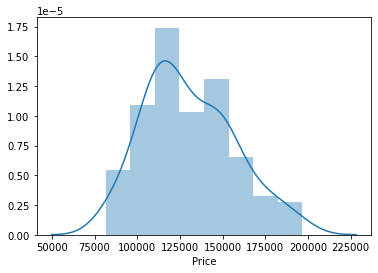

In [20]:
sns.distplot(data_final.Price)
plt.show()

*It's almost near normal but let's try log transformation*

*Log Transformation*

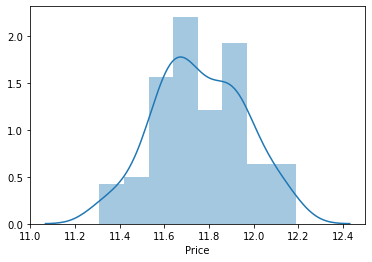

In [21]:
sns.distplot(np.log(data_final.Price))
plt.show()

Curve is almost the same so no log transformation required

In [22]:
data_final.head()

,Bedrooms,Bathrooms,Offers,Neighborhood_East,Neighborhood_North,Neighborhood_West,Brick_No,Brick_Yes,Price,SqFt
0,2,2,2,1,0,0,1,0,114300,1790.0
1,4,2,3,1,0,0,1,0,114200,2030.0
2,3,2,1,1,0,0,1,0,114800,1740.0
3,3,2,3,1,0,0,1,0,94700,1980.0
4,3,3,3,1,0,0,1,0,119800,2130.0


*Linearity Assumption*

In [23]:
#Creating a correlation matrix
corr_mat=data_final.corr()

#Saving correlation matrix
corr_mat.to_csv("Correaltion_Matrix.csv")

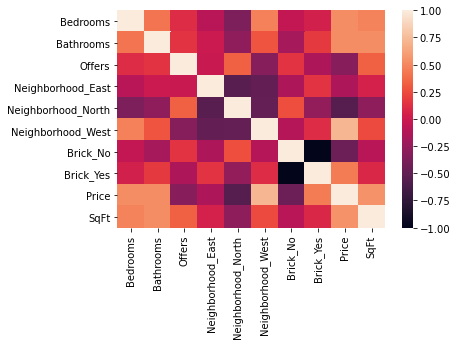

In [24]:
sns.heatmap(data_final.corr())
plt.show()

**Variable Reduction**

*A) Recursive Feature Elimination*

In [25]:
features = data_final[data_final.columns.difference( ['Price'] )]
target = data_final['Price']

In [26]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import itertools

lm = LinearRegression()

# create the RFE model and select 5 attributes
rfe = RFE(lm, n_features_to_select=5)
rfe = rfe.fit(features, target)

In [27]:
rfe_support=rfe.support_
rfe_support

array([ True, False,  True,  True, False,  True,  True, False, False])

In [28]:
RFE_features=features.columns[rfe_support]
RFE_features

Index(['Bathrooms', 'Brick_No', 'Brick_Yes', 'Neighborhood_North',
       'Neighborhood_West'],
      dtype='object')

*B) F-Regression*

In [29]:
from sklearn.feature_selection import f_regression
F_Values,P_Values=f_regression(features,target)

In [30]:
#Combining 3 columns into a single dataframe
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_Values,  ['%.3f' % p for p in P_Values])]

In [31]:
#Converting f_reg_results to dataframe
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [32]:
f_reg_results=f_reg_results.sort_values(by=['F_Value'],ascending=False)
f_reg_results

,Variable,F_Value,P_Value
6,Neighborhood_West,135.215505,0.000
5,Neighborhood_North,55.047264,0.000
8,SqFt,54.380853,0.000
0,Bathrooms,47.735061,0.000
1,Bedrooms,47.698583,0.000
2,Brick_No,32.481130,0.000
3,Brick_Yes,32.481130,0.000
7,Offers,14.329762,0.000
4,Neighborhood_East,2.708280,0.102


In [33]:
f_reg_results.to_csv('F_Regression_Results.csv')

In [34]:
features.columns

Index(['Bathrooms', 'Bedrooms', 'Brick_No', 'Brick_Yes', 'Neighborhood_East',
       'Neighborhood_North', 'Neighborhood_West', 'Offers', 'SqFt'],
      dtype='object')

*Variance Inflation Factor*

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_list=['Brick_Yes',
           'Neighborhood_West','SqFt','Neighborhood_North']
vif_features=features[vif_list]

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(vif_features.values, i) for i in range(vif_features.shape[1])]
vif["features"] = vif_features.columns

vif.sort_values(by=['VIF_Factor'],ascending=False)

,VIF_Factor,features
2,3.586662,SqFt
3,1.955746,Neighborhood_North
1,1.898675,Neighborhood_West
0,1.588754,Brick_Yes


In [36]:
vif.to_csv('VIF_Results.csv')

**Train-Test Split**

In [37]:
train, test = train_test_split( data_final, test_size = 0.3, random_state = 1234 )

In [38]:
display(train.shape)
display(test.shape)

(89, 10)

(39, 10)

**Modelling**

In [39]:
import statsmodels.formula.api as smf

In [99]:
#Initially selected best independent features were  
#Brick_Yes+Neighborhood_West+SqFt+Neighborhood_North

#Neighborhood_North was eliminated because it was insignificant as the p-value>0.05
formula='Price~Brick_Yes+Neighborhood_West+SqFt'

model = smf.ols(formula, data=train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     96.87
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           2.45e-27
Time:                        01:05:38   Log-Likelihood:                -959.87
No. Observations:                  89   AIC:                             1928.
Df Residuals:                      85   BIC:                             1938.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.805e+04   1.23e+0

*Predicting train values*

In [100]:
train['pred']=pd.DataFrame(model.predict(train))
train.head()

<ipython-input-100-f11b62596c9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['pred']=pd.DataFrame(model.predict(train))


,Bedrooms,Bathrooms,Offers,Neighborhood_East,Neighborhood_North,Neighborhood_West,Brick_No,Brick_Yes,Price,SqFt,pred
86,4,2,4,0,1,0,1,0,102700,1900.0,110114.511043
97,2,2,1,1,0,0,0,1,126800,2000.0,134029.409043
89,2,2,4,0,1,0,1,0,97800,2010.0,115444.820613
20,3,2,3,1,0,0,1,0,116200,1790.0,104784.201474
118,3,2,3,0,1,0,0,1,150200,1950.0,131606.541057


*Predicting Test Values*

In [101]:
test['pred']=pd.DataFrame(model.predict(test))
test.head()

<ipython-input-101-afdbcc781629>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred']=pd.DataFrame(model.predict(test))


,Bedrooms,Bathrooms,Offers,Neighborhood_East,Neighborhood_North,Neighborhood_West,Brick_No,Brick_Yes,Price,SqFt,pred
51,2,2,3,0,1,0,1,0,91100,1860.0,108176.216654
59,4,2,1,0,0,1,1,0,155400,2090.0,151803.519743
85,4,3,2,0,0,1,0,1,188300,2250.0,178625.859327
77,4,3,3,0,0,1,0,1,176500,2280.0,180079.580118
35,3,3,3,0,1,0,1,0,117100,2080.0,118836.835794


**Estimating Accuracy Metrices**

In [103]:
train_pred=train.pred
train_actual=train.Price
train_error=train_actual-train_pred

In [104]:
test_pred=test['pred']
test_actual=test['Price']
test_error=test_actual-test_pred

*MAPE*

In [114]:
train_MAPE = np.mean(np.abs(train_error)/train_actual)
print(train_MAPE)
test_MAPE  = np.mean(np.abs(test_error)/test_actual)
print(test_MAPE)

0.07474081842717735
0.08271261411424867


*RMSPE*

In [111]:
train_RMSPE = np.sqrt(np.mean(np.square((train_error)/train_actual)))
print(train_RMSPE)
test_RMSPE  = np.sqrt(np.mean(np.square((test_error/test_actual))))
print(test_RMSPE)

0.0946390341420469
0.12232163114974835


*Correlation Coefficient*

In [115]:
np.corrcoef(train_actual, train_pred)

array([[1.        , 0.87960685],
       [0.87960685, 1.        ]])

In [116]:
np.corrcoef(test_actual, test_pred)

array([[1.        , 0.90009707],
       [0.90009707, 1.        ]])

*Plotting the Errors*

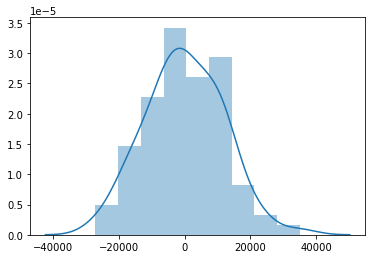

'Errors following Normal Distribution'

In [121]:
sns.distplot(train_error)
plt.show()
display('Errors following Normal Distribution')

In [122]:
#Errors do not have a relationship with Y
np.corrcoef(train_actual,train_error)

array([[1.        , 0.47570137],
       [0.47570137, 1.        ]])

*Decile Analysis*

In [132]:
#Decile Analysis
train_results = pd.concat([train_actual, train_pred], axis=1)
test_results = pd.concat([test_actual, test_pred], axis=1)
train_results.columns = ['actual', 'pred']
test_results.columns = ['actual', 'pred']

train_results['Deciles']=pd.qcut(train_results['pred'],10,labels=False)
test_results['Deciles']=pd.qcut(test_results['pred'],10,labels=False)

train_decile=train_results.groupby(['Deciles']).mean()[['actual','pred']]
test_decile=test_results.groupby(['Deciles']).mean()[['actual','pred']]

In [134]:
display(train_decile)
train_decile.to_csv('train_decile.csv')

,actual,pred
Deciles,,
0,104064.000000,100330.000968
1,107862.500000,109751.080845
2,113000.000000,113799.017958
3,117711.111111,118982.472534
4,124466.666667,126108.528820
5,129362.500000,131768.867106
6,140730.000000,137017.397586
7,141350.000000,144389.574235
8,161766.666667,157513.808956


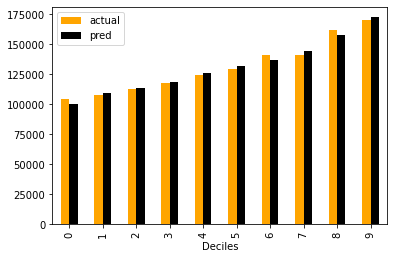

In [152]:
train_decile.plot(kind='bar',color=['orange','black'])
plt.show()

In [135]:
display(test_decile)
test_decile.to_csv('test_decile.csv')

,actual,pred
Deciles,,
0,99625.000000,97515.597515
1,102560.000000,106722.495863
2,102675.000000,113627.669623
3,125550.000000,117261.971603
4,117866.666667,120347.487164
5,110200.000000,125677.796733
6,139075.000000,143037.607793
7,146175.000000,150994.294048
8,163350.000000,162471.089285


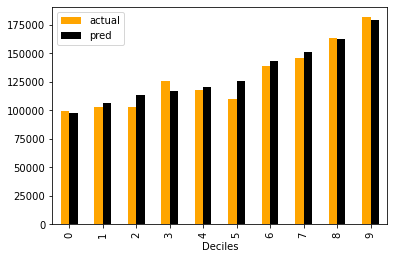

In [153]:
test_decile.plot(kind='bar',color=['orange','black'])
plt.show()

In [154]:
#Mathematical Equation of Model----> Price=19070*Brick_Yes+32480*Neighborhood_West+48.4574 *SqFt+18050
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     96.87
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           2.45e-27
Time:                        02:22:28   Log-Likelihood:                -959.87
No. Observations:                  89   AIC:                             1928.
Df Residuals:                      85   BIC:                             1938.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.805e+04   1.23e+0

**Mathematical Equation of Model--->  Price =   19070(Brick_Yes) + 32480(Neighborhood_West) + 48.4574(SqFt) + 18,050**

*Creating a Pickle Object*

In [158]:
import pickle

with open('model_ols.pkl','wb') as f:
    pickle.dump(model,f)

In [159]:
#To load the pickle later
with open('model_ols.pkl','rb') as f:
    model=pickle.load(f)